In [1]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [2]:
import sys
import os

py_file_location = "/content/drive/My Drive/Colab Notebooks/Summer24Notebooks/forAnalysis"
sys.path.append(os.path.abspath(py_file_location))
os.chdir(py_file_location)
!ls

 Daphnia_Behavior_Analysis_Cuvette-Sleap.ipynb			       functionsSleap.py
'Daphnia_Behavior_Calculator - Sleap.ipynb'			       functions_SLEAP.py
'Daphnia_Behavior_Calculator - Sleap - Multianimal - tracking.ipynb'   __pycache__
 Figure1c.ipynb							      'Sleap Analysis.ipynb'
 FreeSwimVid.h5							       sleapResources.py
 functions.py


In [3]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, HTML
#display(HTML("<style>.container { width:60% !important; }</style>"))
import cv2
import glob
import random
import functionsSleap as functions

In [ ]:
cutoff = 1000 #how long does the trajectory have to be?

trial_number = 1
daphniaLength = 18#Length of daphnia in pixels
daphniaWidth = 15#Width of daphnia in pixels
enclosurePixel = 314 #Number of pixels,pixel across

frameRate = 30 #Framerate of the Video
VideoDimension = [319,321] #read this vlaue of the top left in imageJ after cropping the video so that you mainly see the enclosure
enclosureMm = 40 #The length of pixels in mm

#The scale which is used to switch from pixel values to mm

scale = enclosureMm/enclosurePixel

date = "6.6.24"
first_part_of_name = "FreeSwimVid"

# the address of the analyzed daphnia h5 file
#adress = first_part_of_name + "5-18-23_DT"+str(trial_number)+ "CROP.avi.predictions.000_5-18-23_DT"+str(trial_number)+ "CROP.analysis" + ".h5"
adress = first_part_of_name + ".h5"

#Filename that the data will get saved in
name = first_part_of_name + date + '_T' + str(trial_number)+'_behavior.xls'

#middle_data = file(r"C:\Users\dasguptalab\Dasgupta Dropbox\Moumita Dasgupta\PC\Documents\Daphnia Research\Research\Summer Research 2023\Free_swimming\May 18\T1\5-18-23_DT1CROP.avi.predictions.000_5-18-23_DT1CROP.analysis.h5")
middle_data = functions.file(adress)

===filename===
FreeSwimVid.h5

===HDF5 datasets===
['edge_inds', 'edge_names', 'instance_scores', 'labels_path', 'node_names', 'point_scores', 'provenance', 'track_names', 'track_occupancy', 'tracking_scores', 'tracks', 'video_ind', 'video_path']

===locations data shape===
(1800, 1, 2, 1)

===nodes===
0: Center



In [ ]:
data = functions.angles(middle_data)

Continue? y


In [ ]:
# #This functions filters the daphnia Data (Shouldnt be needed if we only have one daphnia)
# x, y = functions.filters_sleap(data,VideoDimension[1])
# print("There is", len(x), "daphnia for video: ", adress)

# x = [x[0][0:1800]] #Modified length because controll file data captured for a total of 1200 frames
# y = [y[0][0:1800]]

# #Finds the Mean Square Displacement of each of the individual tracks"
# allmsd, avgallmsd, varallmsd = functions.msd(x, y)

# #finds the direction in which the long end of the daphnia points. (Not sure about this)
# #direction = functions.dirfinder(O)

# #finds the change in area of the indivdual daphnia
# #area = functions.areafinder(L, W)

# #will give a warning if divided by 0 but should be ok! Finds the speed and direction based on position of the daphnia
# speed, acc, direction, diffdirection = functions.velfinder(x,y)
#This functions filters the daphnia Data (Shouldnt be needed if we only have one daphnia)
x, y = functions.filters_sleap(data,VideoDimension[1])
print("There is", len(x[0]), "daphnia for video: ", adress)

#Finds the Mean Square Displacement of each of the individual tracks"
allmsd, avgallmsd, varallmsd = functions.msd(x, y)

#will give a warning if divided by 0 but should be ok! Finds the speed and direction based on position of the daphnia
speed, acc, direction, diffdirection = functions.velfinder(x,y)

There is 1800 daphnia for video:  FreeSwimVid.h5


Trajectory of the Daphnia [ 0.0 , 59966.66666666667 ] ms or [  0.0 , 59.96666666666667 ] s


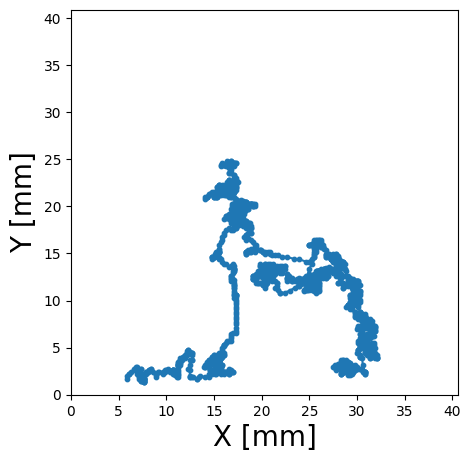

In [ ]:
#Plots the trajectory (it should look like the enclosure [if not change VideoDimensions]).
#The code adjust itself based on the videodimensions
functions.PlotTrajectory(x[0][1:], y[0][1:], [0, len(x[0][1:1800])], VideoDimension, frameRate, scale)
#functions.PlotTrajectory(x[0], y[0], [0, len(x[0][0])], VideoDimension, frameRate, scale)

In [ ]:
minPrePostPeakSlope = 0.8 #Minimum value the speed value has to be different from its previous point or next point
minThreshold = 1.8 #Minimum Speed Value 1
#If this value is large it will group more power strokes into a bout
#(the time between power strokes can be larger while still being in the same bout
peak_together = 5

#Caluclating where the peaks are (power strokes)
#peaks grouped together in a bout
position_of_peaks, peaks, peak_displacement = functions.PowerStrokes(speed, acc,  minThreshold, minPrePostPeakSlope, peak_together)

#Putting the power strokes into bouts
power_strokes = functions.PowerStrokeBout(peaks, x, y, speed)
#power_strokes = functions.PowerStrokeBout(peaks, x[0], y[0], speed)
#Putting the post power strokes into bouts
post_power_strokes = functions.PostPowerStrokeBout(power_strokes, x, y, speed)
#post_power_strokes = functions.PostPowerStrokeBout(power_strokes, x[0], y[0], speed)

In [ ]:
for i in position_of_peaks[0]:
    print(i, end = ", ")
####reflects peaks of velocity actual frame +1 and represents speed of that frame plus next ex: 7 (actually 8, 8-->9)m

9, 11, 16, 23, 28, 32, 38, 40, 42, 52, 58, 61, 65, 69, 75, 78, 80, 85, 89, 91, 99, 102, 107, 113, 120, 129, 135, 137, 141, 147, 149, 153, 158, 162, 170, 174, 177, 180, 185, 196, 199, 207, 209, 221, 225, 227, 233, 236, 239, 242, 245, 247, 254, 262, 266, 269, 272, 274, 278, 280, 283, 288, 291, 293, 302, 310, 312, 316, 324, 337, 339, 341, 345, 349, 352, 354, 357, 363, 365, 367, 375, 377, 379, 383, 388, 393, 396, 398, 406, 414, 419, 424, 430, 432, 434, 436, 440, 442, 444, 452, 457, 460, 463, 466, 471, 474, 479, 484, 496, 498, 500, 502, 504, 507, 510, 512, 514, 517, 519, 521, 539, 541, 543, 545, 548, 550, 552, 556, 565, 573, 577, 579, 582, 590, 593, 595, 601, 604, 608, 614, 625, 628, 630, 633, 635, 637, 639, 641, 644, 647, 651, 654, 658, 662, 665, 668, 677, 681, 683, 686, 688, 691, 694, 697, 699, 709, 714, 724, 727, 729, 736, 739, 746, 749, 751, 754, 756, 761, 763, 766, 769, 774, 776, 779, 781, 784, 791, 794, 798, 800, 803, 807, 810, 816, 820, 822, 824, 827, 830, 835, 837, 845, 847, 849, 85

In [ ]:
len(position_of_peaks[0])

417

In [ ]:
peaks[0] #ex : [13,28] --> [14,29] --> [14-->15,29-->30]

[[7, 16, 3],
 [23, 32, 3],
 [38, 42, 3],
 [52, 52, 1],
 [58, 69, 4],
 [75, 91, 6],
 [99, 107, 3],
 [113, 113, 1],
 [120, 120, 1],
 [129, 129, 1],
 [135, 141, 3],
 [147, 162, 5],
 [170, 185, 5],
 [196, 199, 2],
 [207, 209, 2],
 [221, 227, 3],
 [233, 247, 6],
 [254, 254, 1],
 [262, 293, 11],
 [302, 302, 1],
 [310, 316, 3],
 [324, 324, 1],
 [337, 357, 8],
 [363, 367, 3],
 [375, 398, 8],
 [406, 406, 1],
 [414, 424, 3],
 [430, 444, 7],
 [452, 484, 9],
 [496, 521, 12],
 [539, 556, 8],
 [565, 565, 1],
 [573, 582, 4],
 [590, 595, 3],
 [601, 608, 3],
 [614, 614, 1],
 [625, 668, 16],
 [677, 699, 9],
 [709, 714, 2],
 [724, 729, 3],
 [736, 739, 2],
 [746, 784, 14],
 [791, 810, 7],
 [816, 837, 8],
 [845, 852, 4],
 [871, 881, 5],
 [891, 895, 3],
 [911, 918, 3],
 [928, 932, 2],
 [939, 941, 2],
 [951, 975, 10],
 [982, 992, 4],
 [999, 1006, 3],
 [1012, 1033, 8],
 [1040, 1040, 1],
 [1047, 1079, 10],
 [1086, 1113, 8],
 [1120, 1123, 2],
 [1135, 1140, 3],
 [1147, 1147, 1],
 [1155, 1174, 7],
 [1184, 1184, 1

In [ ]:
len(power_strokes[0])

94

In [ ]:
for ps in power_strokes[0]:
    print(ps)

[6, 17, 3, 1.1370079629525047, -4.300872802734375, -3.782623291015625, 0.5360437051701978, 3.965850830078125, 6.655426025390625, 10.685005682483595]
[22, 33, 3, -0.6456025354073015, 4.190032958984375, -6.4901123046875, 0.5292086808483023, 6.3173370361328125, 10.126708984375, 14.597548610019492]
[37, 43, 3, -0.018050237960435225, -0.0982666015625, 5.444061279296875, 0.6174066041236977, 5.6658935546875, 2.505157470703125, 8.819063544954869]
[51, 53, 1, -60.16461232604374, 2.308868408203125, -0.0383758544921875, 0.9976250297796929, 0.0577545166015625, 0.288543701171875, 2.3146846170221425]
[57, 70, 4, 1.552306896866351, 2.336395263671875, 1.5051116943359375, 0.16433151116287734, 4.074737548828125, 12.502593994140625, 16.912320822403245]
[74, 92, 6, -0.6036226010419721, -5.874755859375, 9.732498168945312, 0.40410912127912707, 12.676422119140625, 18.523406982421875, 28.13132613248711]
[98, 108, 3, -1.6968510926423654, 6.27130126953125, -3.6958465576171875, 0.5951390929352058, 4.053268432617

In [ ]:
print(len(post_power_strokes[0]))

95


In [ ]:
for ps in post_power_strokes[0]:
    print(ps)

[0, 6, 6, 3.656849282181783, -5.810638427734375, -1.5889739990234375, 0.7507907565776785, 6.7357177734375, 16.61273193359375, 22.527749426908045]
[18, 21, 3, 3.656849282181783, -5.810638427734375, -1.5889739990234375, 0.7507907565776785, 6.7357177734375, 16.61273193359375, 22.527749426908045]
[34, 36, 2, 0.5480848828323994, 2.101348876953125, 3.833984375, 0.9509383737258531, 1.615142822265625, 1.69610595703125, 4.597650469317505]
[44, 50, 6, 2.164677520669575, -3.89117431640625, -1.797576904296875, 0.5562042348331663, 1.79595947265625, 5.3265380859375, 7.7063739039313655]
[54, 56, 2, 22.66866679167448, -1.84466552734375, -0.0813751220703125, 0.9987623496770546, 0.028106689453125, 0.119537353515625, 1.8487476391605862]
[71, 73, 2, -1.306590833726901, 1.98406982421875, -1.5185089111328125, 0.7674591045790405, 1.4585723876953125, 0.202056884765625, 3.2555220195244363]
[93, 97, 4, 0.9704308164880001, -1.908966064453125, -1.967132568359375, 0.7555115349800561, 1.7937469482421875, 1.80014038

[248.24375915527344, 249.7339324951172, 248.11386108398438, 244.15338134765625, 242.25672912597656, 241.89085388183594, 239.9228057861328, 238.2468719482422, 238.29348754882812, 238.22706604003906, 239.85577392578125, 240.0931396484375, 240.02093505859375, 240.07810974121094, 240.3055877685547, 243.9563751220703, 245.8299560546875, 246.25811767578125, 248.0541534423828, 248.28868103027344, 249.79452514648438, 247.9163055419922, 245.98248291015625, 244.25990295410156, 244.11227416992188, 243.96388244628906, 244.01513671875, 246.3300018310547, 247.81277465820312, 247.9058380126953, 249.87530517578125, 250.2521514892578, 250.15545654296875, 248.12802124023438, 247.93856811523438, 245.8895721435547, 244.04054260253906, 242.22019958496094, 241.80628967285156, 240.22991943359375, 240.24046325683594, 241.75540161132812, 241.923828125, 244.0591583251953, 245.7465362548828, 246.06417846679688, 248.19210815429688, 249.95748901367188, 250.11203002929688, 250.10984802246094, 250.2545166015625]
[0.

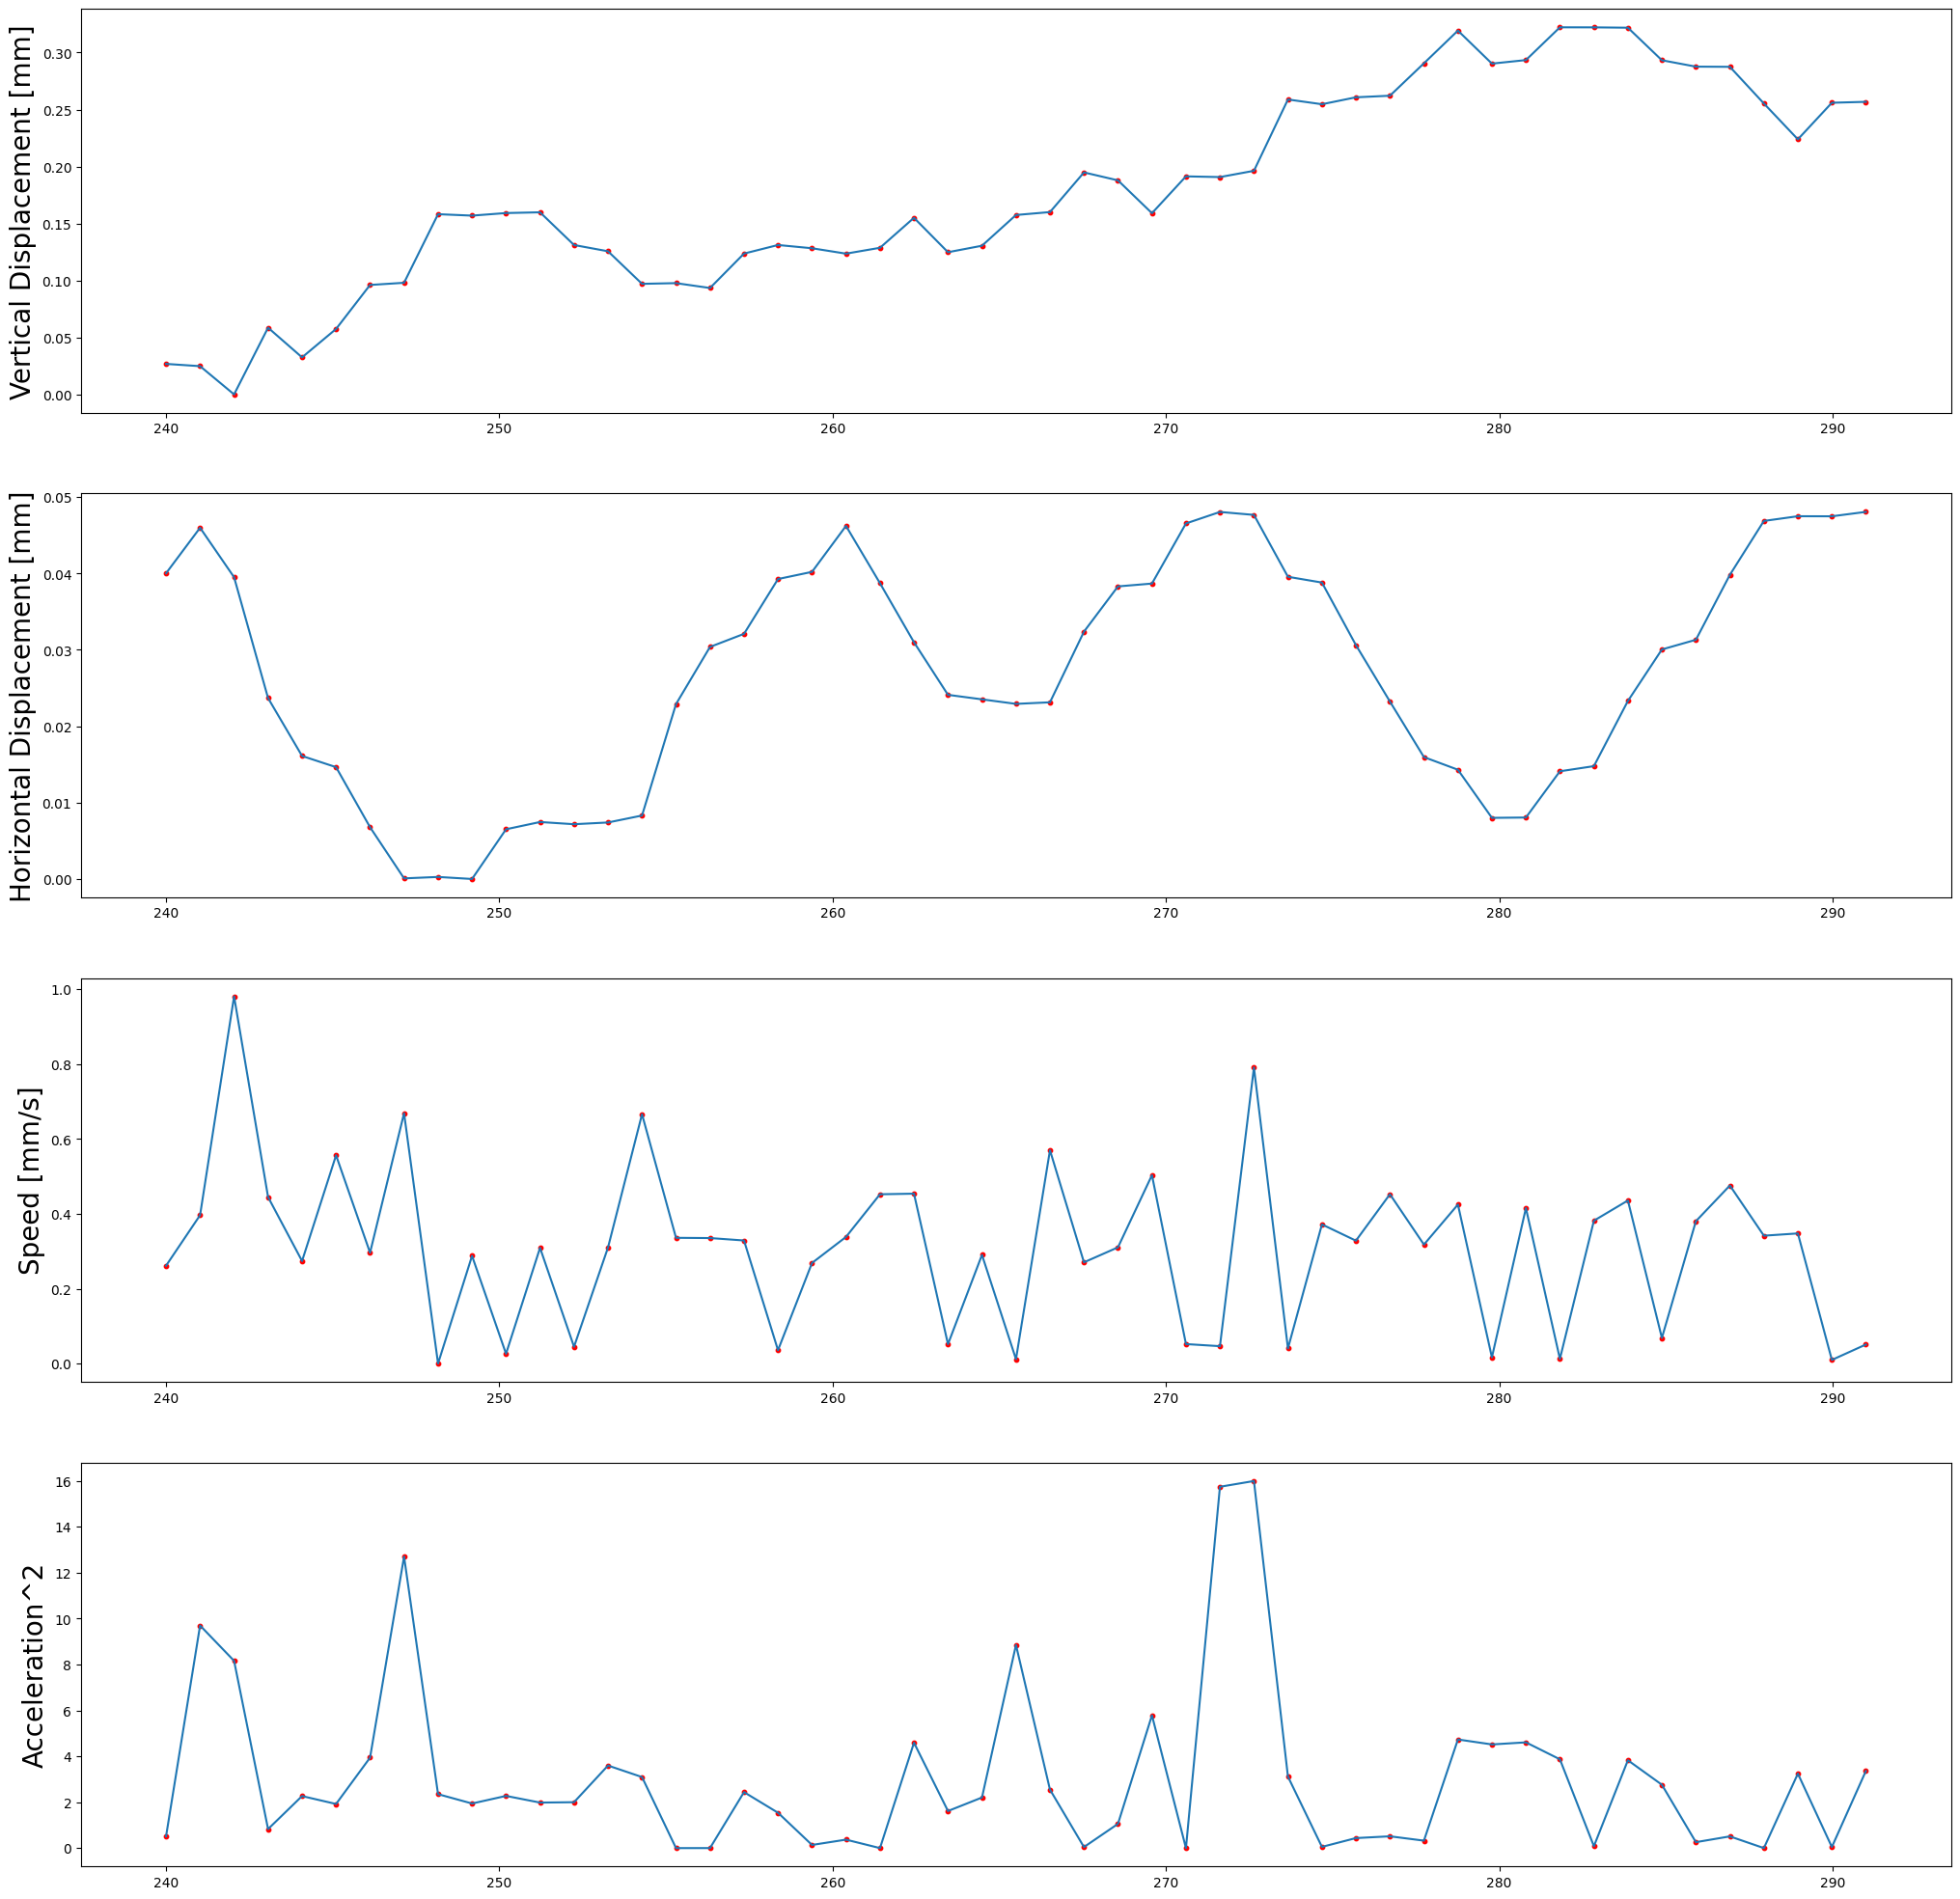

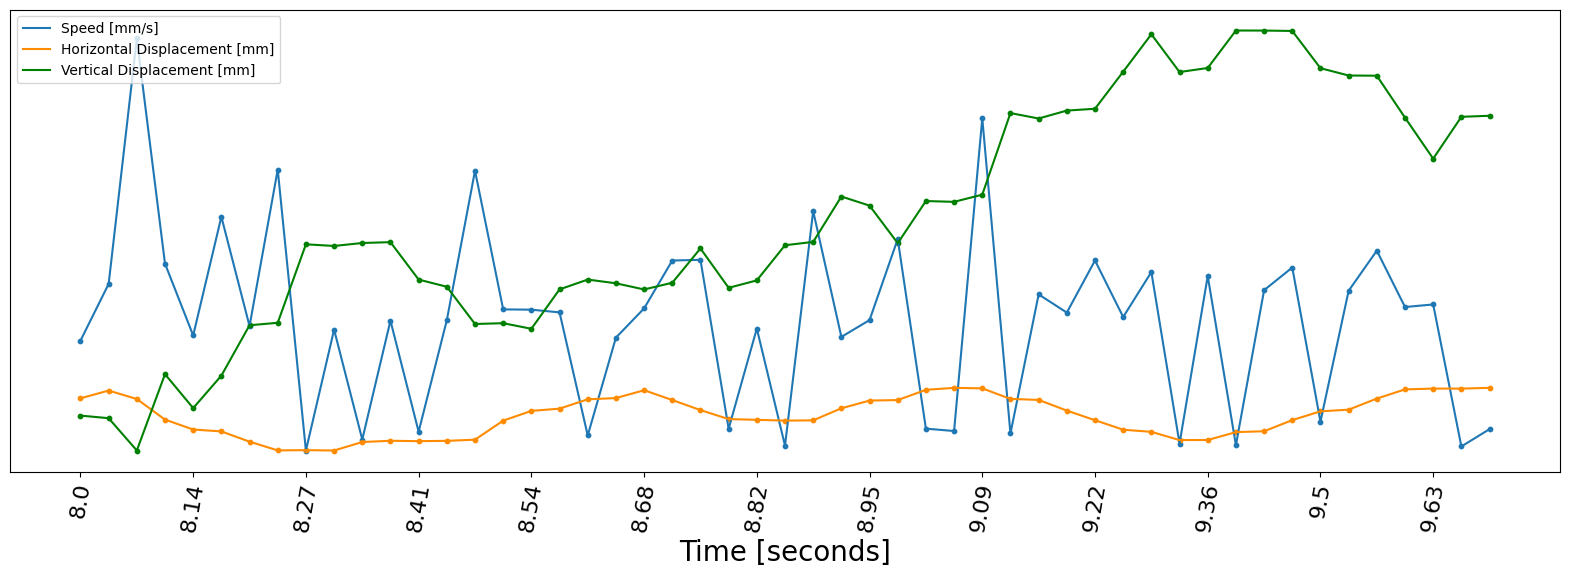

In [ ]:
#functions.PlotData(0, [240, 291], x[0], y[0], speed, acc, direction, diffdirection, scale, VideoDimension)
functions.PlotData2(0, [240, 291], x, y, speed, acc, direction, diffdirection, scale, VideoDimension)


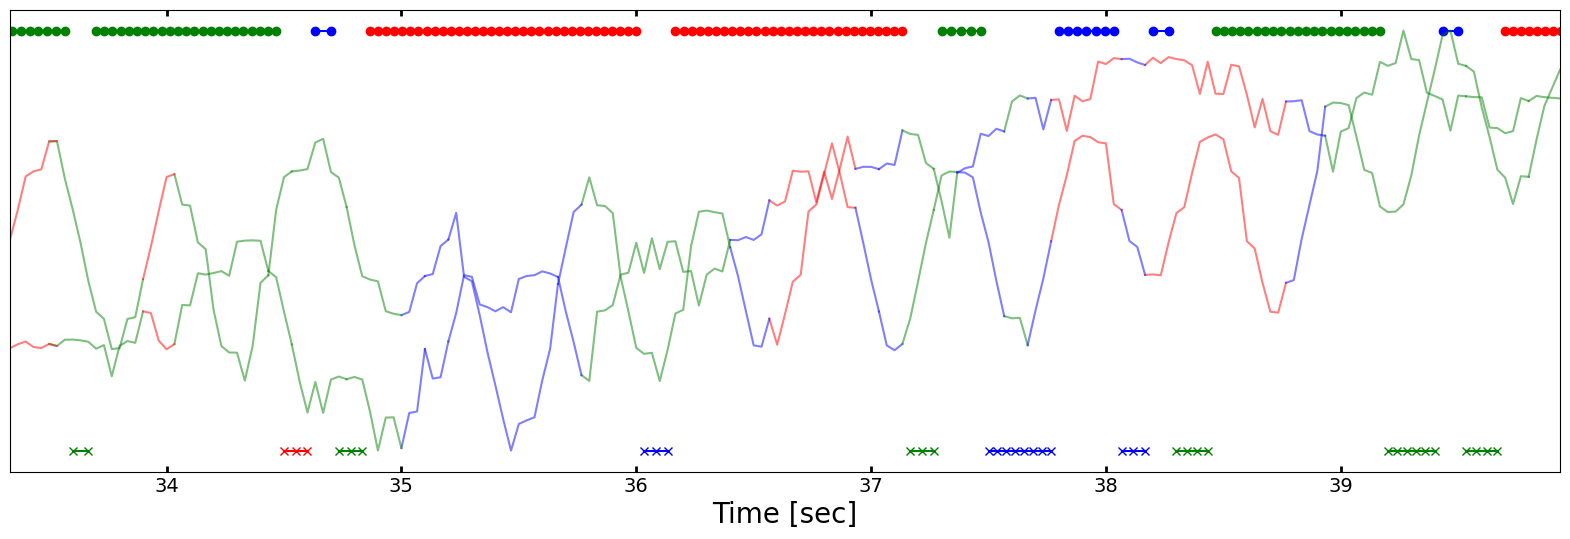

In [ ]:
minHopSlope = 1 # Minimum Slope for it to count as Hopping
minHopDist = 0.5 #Minimum Distance it needs to travel for it to count as a Hop

minSinkSlope = 1 #Minimum Slope for it to count as Sinking
minSinkDist = -0.5 #Minimum Vertical Distance for it to count as Sinking

Radius = 0.5

Size = [1000,1198]

show_all_plots = [False,True, True] #[speed, vertical, horizontal]
hopping, zooming, sinking, drifting, hovering, hovering2 = functions.PlotBehavior(power_strokes[0], minHopSlope, minHopDist, post_power_strokes[0], minSinkSlope, minSinkDist, Size, x, y, speed, scale, Radius, show_all_plots)

In [ ]:
#Saving the data
!pip install xlwt


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 kB 2.5 MB/s eta 0:00:00


In [ ]:
#Saving the data

accThreshold = 0 #Ignore this value we dont use it
functions.SafeDataAnalysis_sleap(x[0], y[0],allmsd[0], speed[0], acc[0], power_strokes[0], post_power_strokes[0], peak_displacement[0], minPrePostPeakSlope, minThreshold, accThreshold, frameRate, daphniaLength, daphniaWidth, enclosurePixel, enclosureMm, scale, name,peak_together)

In [ ]:
def PlotData(index, windowsize, x, y, speed, acc, direction, diffdirection, scale, VideoDimension):

    import matplotlib.pyplot as plt
    import numpy as np

    acc[0] = [i**2 for i in acc[0]]

    #Plotting some data to see the magnite of speed and displacements
    #The x and y values are not adjusted with the scale

    speed = [(i-min(speed[index][windowsize[0]:windowsize[1]]))/max(speed[index][windowsize[0]:windowsize[1]]) for i in speed[index][windowsize[0]:windowsize[1]]]

    y = [(i-min(y[index][windowsize[0]:windowsize[1]]))/max(y[index][windowsize[0]:windowsize[1]]) for i in y[index][windowsize[0]:windowsize[1]]]
    print(x[index][windowsize[0]:windowsize[1]])
    x = [(i-min(x[index][windowsize[0]:windowsize[1]]))/max(x[index][windowsize[0]:windowsize[1]]) for i in x[index][windowsize[0]:windowsize[1]]]

    print(x)

    fig, (ax0, ax1, ax2, ax3) = plt.subplots(4, 1, figsize=(10, 30))
    x5 = np.linspace(windowsize[0], windowsize[1], windowsize[1]-windowsize[0])
    x5ticks = [round(i/30, 3) for i in x5]

    ax0.plot(x5, y)
    ax0.scatter(x5, y, s=10, color="red")
    ax0.set_ylabel("Vertical Displacement [mm]", fontsize = 20)
    #ax0.set_ylim(0, VideoDimension[1]*scale)

    ax1.plot(x5, x)
    ax1.scatter(x5, x, s=10, color="red")
    ax1.set_ylabel("Horizontal Displacement [mm]", fontsize = 20)
    #ax1.set_ylim(0, VideoDimension[0]*scale)

    ax2.plot(x5, speed)
    ax2.scatter(x5, speed, s=10, color="red")
    ax2.set_ylabel("Speed [mm/s]", fontsize = 20)

    ax3.plot(x5, acc[index][windowsize[0]:windowsize[1]])
    ax3.scatter(x5, acc[index][windowsize[0]:windowsize[1]], s=10, color="red")
    ax3.set_ylabel("Acceleration^2", fontsize = 20)

    fig.set_size_inches(25, 25, forward=True)
    plt.show()




    fig, (ax4) = plt.subplots(1, 1)

    vertical_horizontal_scale = max(y)/max(x)

    x = [(i-min(x))/max(x) for i in x]
    y = [(i-min(y))/max(y) for i in y]
    #speed = [(i-min(speed))/max(speed) for i in speed]
    x = [i/vertical_horizontal_scale for i in x]
    #y = [i/vertical_horizontal_scale for i in x]
    ax4.plot(x5, speed, label = 'Speed [mm/s]')
    ax4.scatter(x5, speed, s=10)

    ax4.plot(x5, x, label = 'Horizontal Displacement [mm]',color = "darkorange")
    ax4.scatter(x5, x, s=10,color = "darkorange")

    ax4.plot(x5, y, label = 'Vertical Displacement [mm]', color = "green")
    ax4.scatter(x5, y, s=10,color = "green")

    x5new = []
    for h in range(0, len(x5)):
        if(h % 4 == 0):
            x5new.append(x5[h])


    ax4.set_xticks(x5new)
    x5ticksnew = [round(i/30, 2) for i in x5new]
    ax4.set_xticklabels(x5ticksnew, rotation=80, fontsize=16)

    ax4.set_yticklabels([])
    ax4.set_xlabel("Time [seconds]", fontsize = 20)
    ax4.tick_params(left = False)


    fig.set_size_inches(20, 6, forward=True)
    plt.legend(loc = "upper left")
    plt.show()


    return
